In [74]:
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [75]:
caminho_script = 'E:/Coisas/Notas4/upperbag/'
caminho_arquivos = caminho_script + 'csvs/'
caminho_arquivos_raw = caminho_arquivos + 'raw/'
caminho_arquivos_tratados = caminho_arquivos + 'tratado/'
caminho_arquivos_vazios = caminho_arquivos + 'vazio/'

In [76]:
df_fem_sec = pd.read_csv( caminho_arquivos_tratados + 'feminino_secure.csv', encoding='utf-8') # importa

df_fem_sec = df_fem_sec.dropna(subset=['Código da Bag']) # limpa o dataset

colunas_importantes = ['id_cliente', 'Itens Comprados', 'Valor final', 'Bags enviadas'] 
df = df_fem_sec[colunas_importantes] # pega so as colunas que queremos

agregacoes = {'Itens Comprados':['mean'], 'Valor final':['mean'], 'Bags enviadas':['max']}
df_agre = df.groupby(['id_cliente']).agg( agregacoes ) # agrega
df_agre_col = df_agre.copy()
df_agre_col.columns = df_agre_col.columns.map('_'.join)

df_agre_col_na = df_agre_col.dropna() # dropa NA

data = df_agre_col_na.to_numpy()
transformer = Normalizer().fit( data )
data_norm = transformer.transform( data ) # nromaliza dados
df_agre_col_na_norm = pd.DataFrame( data_norm, columns=df_agre_col_na.columns )

C:\Users\Odete\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning:

Columns (27,29,30) have mixed types.Specify dtype option on import or set low_memory=False.



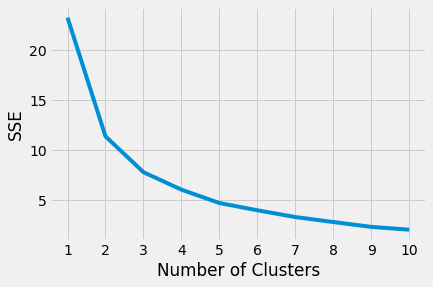

In [77]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_norm)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [78]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data_norm)

KMeans(n_clusters=4)

In [79]:
df_agre_col_na_norm['predict_kmeans'] = df_agre_col_na_norm.apply(lambda row:kmeans.predict(row.to_numpy().reshape(-1,data_norm.shape[1]))[0],axis=1)
df_agre_col_na['predict_kmeans'] = df_agre_col_na.apply(lambda row:kmeans.predict(transformer.transform([row.to_numpy()]).reshape(-1,data_norm.shape[1]))[0],axis=1)

C:\Users\Odete\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
df_agre_col_na_norm['predict_kmeans'].value_counts()

0    1693
3     209
2      28
1       9
Name: predict_kmeans, dtype: int64

In [81]:
import plotly.graph_objects as go

In [82]:
import plotly.express as px
fig = px.box(df_agre_col_na_norm, color='predict_kmeans')
fig.show()

In [83]:
df_agre_col_na[['predict_kmeans']].to_csv( caminho_arquivos_tratados + 'predicoes_fem_v2.csv' )
#df_agre_col_na.truncate(after=-1)[['predicao_kmeans']].to_csv( caminho_arquivos_vazios + 'predicoes_fem.csv', index=False )